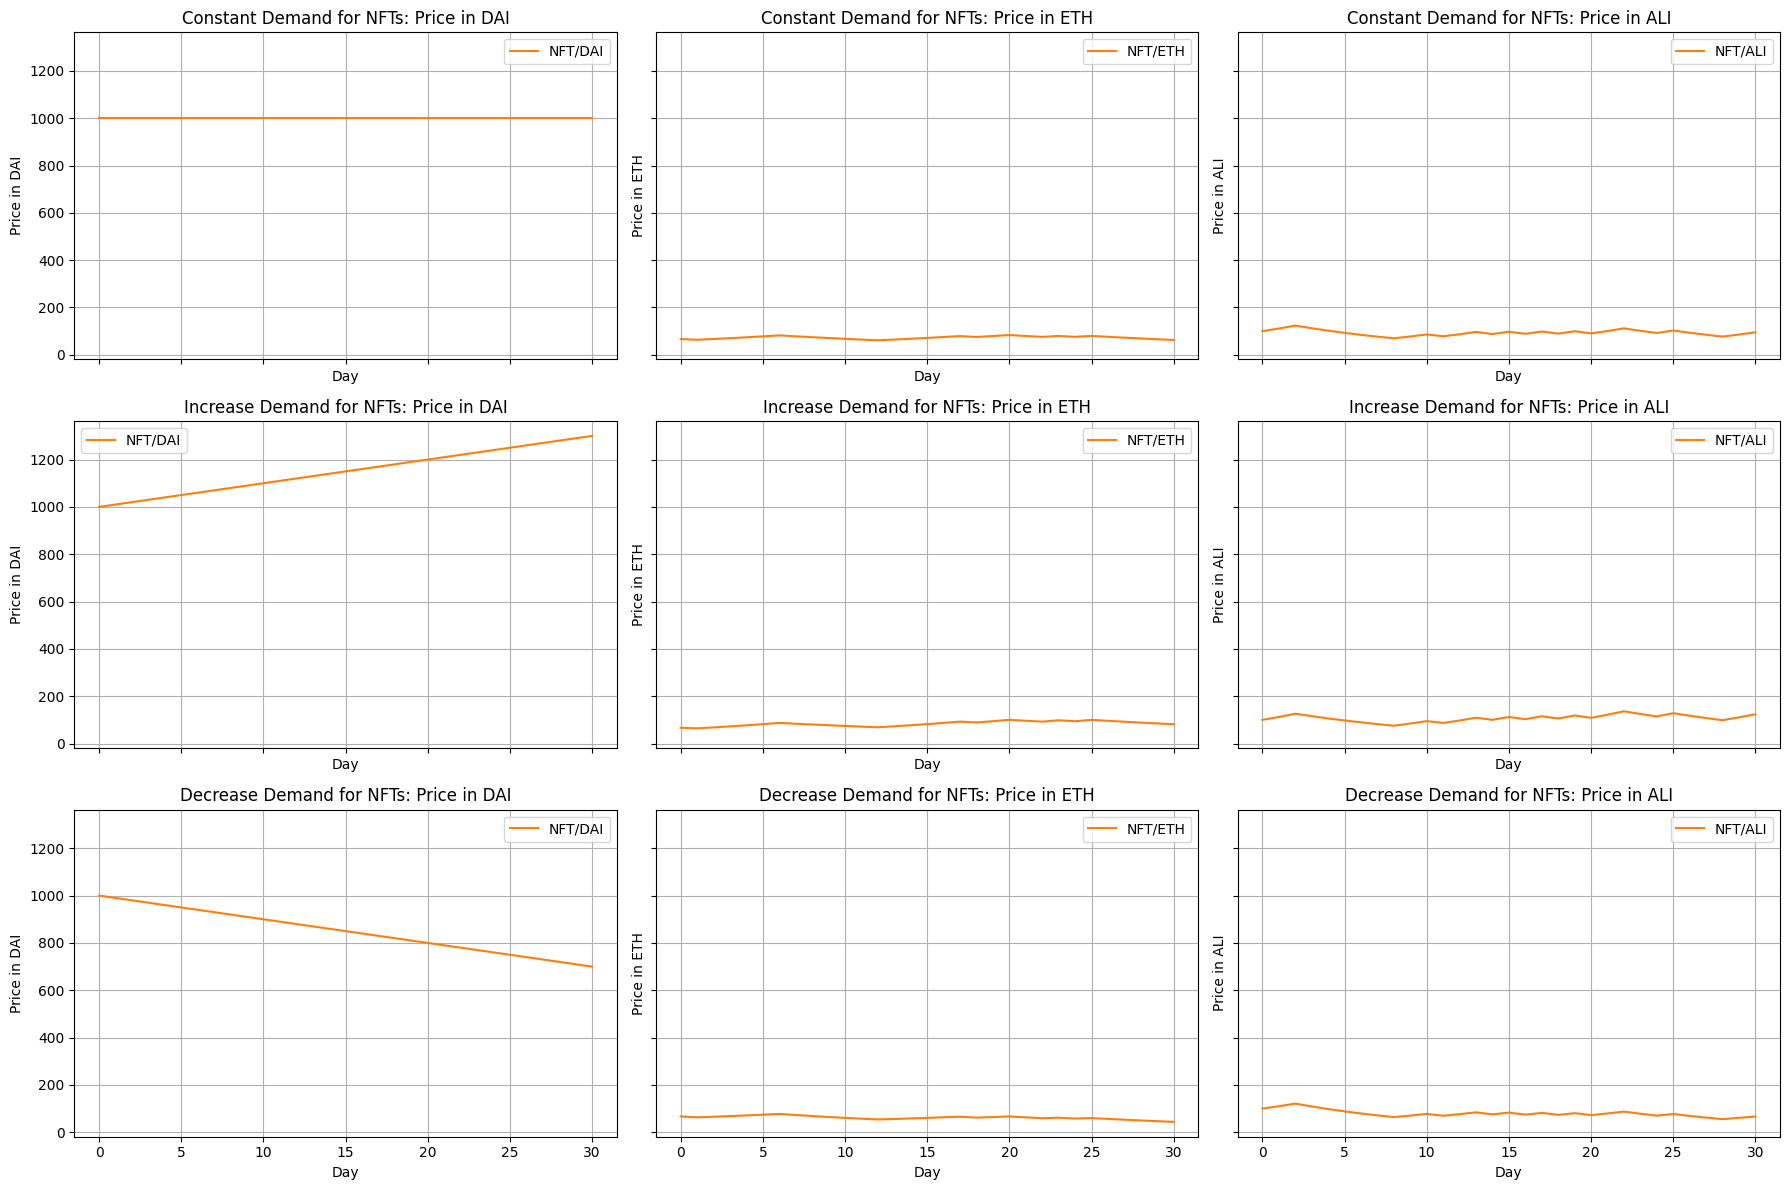

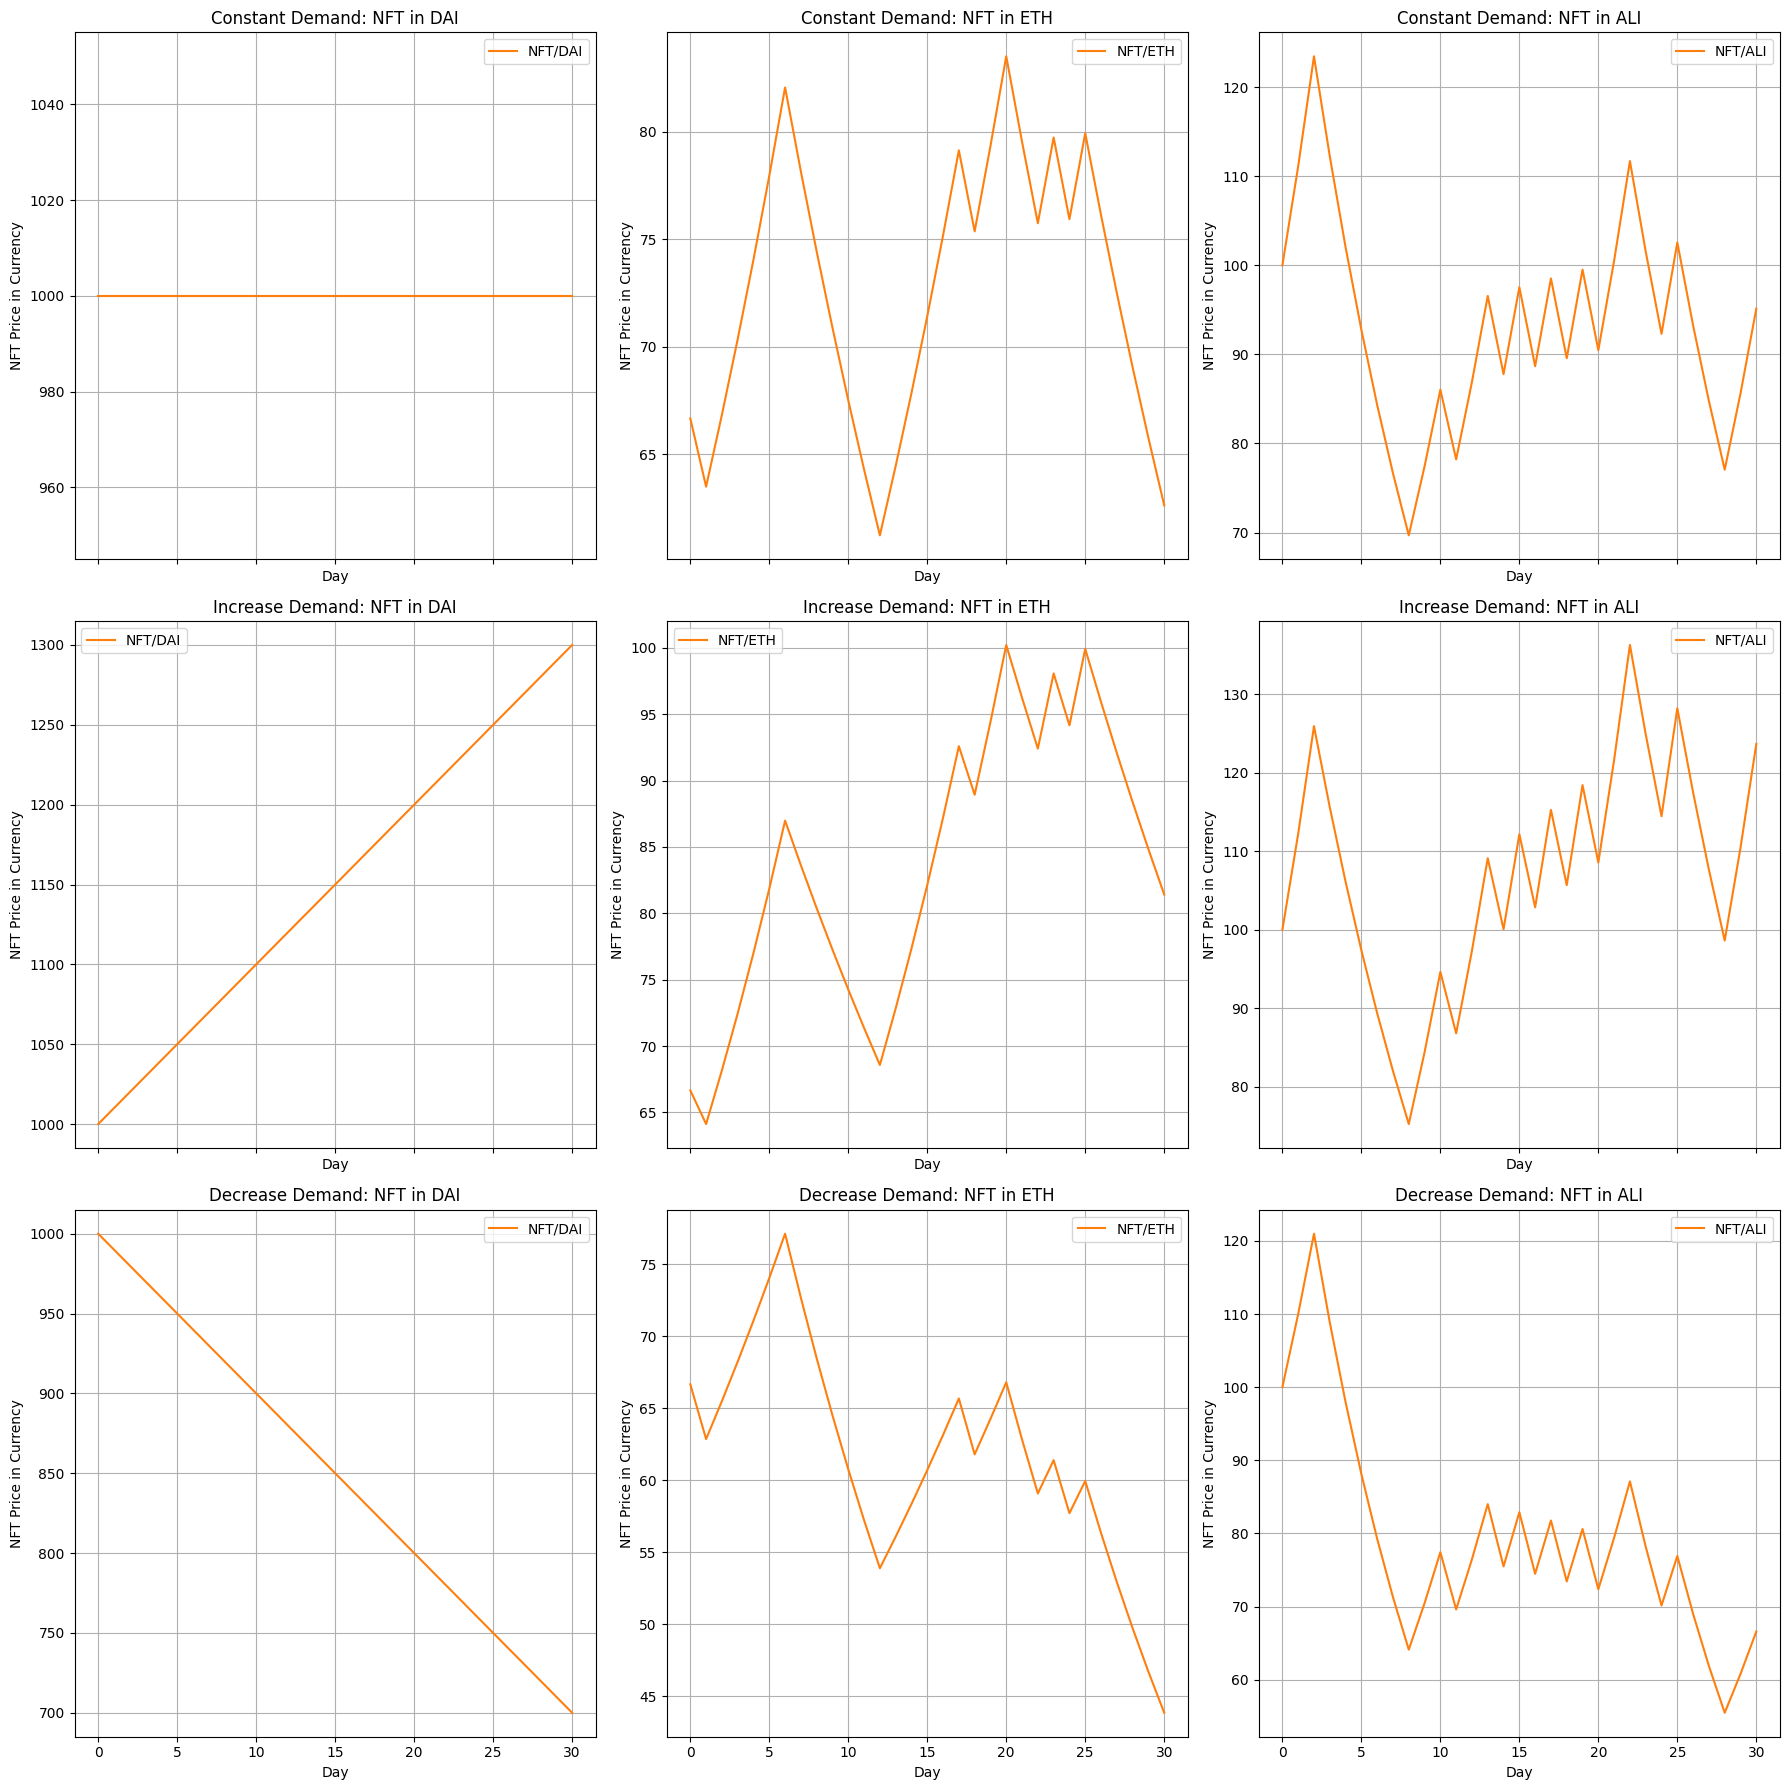

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
days = 30
initial_NFT_price = 1000
volatility_ETH = 0.05
volatility_ALI = 0.1
# Main execution
p_DAI = 1  # DAI price remains constant
p_ETH = 15  # Initial ETH price
p_ALI = 10  # Initial ALI price

#np.random.seed(42)  # For reproducibility

# Simulate daily price changes for ETH and ALI
def simulate_price_changes(initial_price, volatility, days):
    # Randomly decide if the price increases or decreases each day
    daily_changes = np.random.choice([-1, 1], days) * volatility
    prices = [initial_price]
    for change in daily_changes:
        prices.append(prices[-1] * (1 + change))
    return prices

# Adjust NFT price based on demand scenario
def adjust_NFT_price(initial_price, scenario):
    if scenario == "constant":
        return [initial_price] * (days + 1)
    elif scenario == "increase":
        return [initial_price + (i * (initial_price * 0.01)) for i in range(days + 1)]
    elif scenario == "decrease":
        return [initial_price - (i * (initial_price * 0.01)) for i in range(days + 1)]

# Calculate NFT price in terms of the underlying currency
def calculate_nft_price_in_currency(NFT_prices, currency_prices):
    return [NFT_price / currency_price for NFT_price, currency_price in zip(NFT_prices, currency_prices)]

# Plotting function with zoomed-in y-axis


# Simulating price changes
prices_ETH = simulate_price_changes(p_ETH, volatility_ETH, days)
prices_ALI = simulate_price_changes(p_ALI, volatility_ALI, days)
prices_DAI = [p_DAI] * (days + 1)  # DAI stays constant

# Scenarios and currency names
scenarios = ["constant", "increase", "decrease"]
currency_names = ["DAI", "ETH", "ALI"]
currency_prices_dict = {"DAI": prices_DAI, "ETH": prices_ETH, "ALI": prices_ALI}

# Plotting function with shared y-axis scale for comparability
def plot_shared_y_axis(scenarios, currency_names, initial_NFT_prices, currency_prices_dict):
    fig, axes = plt.subplots(len(scenarios), len(currency_names), figsize=(18, 12), sharex=True, sharey=True)

    for i, scenario in enumerate(scenarios):
        NFT_prices_scenario = adjust_NFT_price(initial_NFT_price, scenario)
        for j, currency in enumerate(currency_names):
            currency_prices = currency_prices_dict[currency]
            nft_prices_in_currency = calculate_nft_price_in_currency(NFT_prices_scenario, currency_prices)
            ax = axes[i, j]
            ax.plot(nft_prices_in_currency, label=f'NFT/{currency}', color='tab:orange')
            ax.set_title(f'{scenario.capitalize()} Demand for NFTs: Price in {currency}')
            ax.set_xlabel('Day')
            ax.set_ylabel(f'Price in {currency}')
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()

# Generate plots with a shared Y-axis scale
plot_shared_y_axis(scenarios, currency_names, initial_NFT_price, currency_prices_dict)

# Adjusted plotting function with separate y-axis scales for each plot
def plot_nft_price_in_currency_separate_scales(scenarios, currency_names, initial_NFT_prices, currency_prices_dict):
    fig, axes = plt.subplots(len(scenarios), len(currency_names), figsize=(18, 18), sharex=True)

    for i, scenario in enumerate(scenarios):
        NFT_prices_scenario = adjust_NFT_price(initial_NFT_price, scenario)
        for j, currency in enumerate(currency_names):
            currency_prices = currency_prices_dict[currency]
            nft_prices_in_currency = calculate_nft_price_in_currency(NFT_prices_scenario, currency_prices)
            ax = axes[i, j]
            ax.plot(nft_prices_in_currency, label=f'NFT/{currency}', color='tab:orange')
            ax.set_title(f'{scenario.capitalize()} Demand: NFT in {currency}')
            ax.set_xlabel('Day')
            ax.set_ylabel('NFT Price in Currency')
            ax.legend()
            ax.grid(True)
            # Allowing for separate Y-axis scales
            ax.autoscale(enable=True, axis='y', tight=False)

    plt.tight_layout()
    plt.show()

# Generating plots with separate Y-axis scales
plot_nft_price_in_currency_separate_scales(scenarios, currency_names, initial_NFT_price, currency_prices_dict)



In [18]:
# Constants
points_per_ali_per_epoch = 1
a = 600 * points_per_ali_per_epoch

# Discount factors
discount_factors = [1, 5, 10]

# Given values
w_0 = 600 * points_per_ali_per_epoch

# Calculate costs with given relationships, ignoring discount factor for initial calculation since it's 1
costs_updated = {
    'w_1': w_0,                  # 600 ALI
    'w_2': 5 * w_0,              # 3000 ALI, based on w_1 but the initial calculation was based on w_0 directly
    'w_3': 10 * 5 * w_0,         # 30000 ALI, based on w_2
    'w_4': 4 * 10 * 5 * w_0,    # 1.08M ALI, based on w_3
}

# Points per epoch for each level at different discount factors
points_per_epoch_updated = {}

# Since discount factor adjustments are not needed for the base case (all calculations were already without them),
# we directly use the calculated costs to find points per epoch for each level.
for discount_factor in discount_factors:
    points_per_epoch_updated[discount_factor] = {}
    for level, cost in costs_updated.items():
        # No adjustment needed for cost, as the discount factor is considered in the progression
        # Calculate points per epoch for the level
        points_per_epoch_updated[discount_factor][level] = cost / discount_factor * points_per_ali_per_epoch

points_per_epoch_updated


{1: {'w_1': 600.0, 'w_2': 3000.0, 'w_3': 30000.0, 'w_4': 120000.0},
 5: {'w_1': 120.0, 'w_2': 600.0, 'w_3': 6000.0, 'w_4': 24000.0},
 10: {'w_1': 60.0, 'w_2': 300.0, 'w_3': 3000.0, 'w_4': 12000.0}}

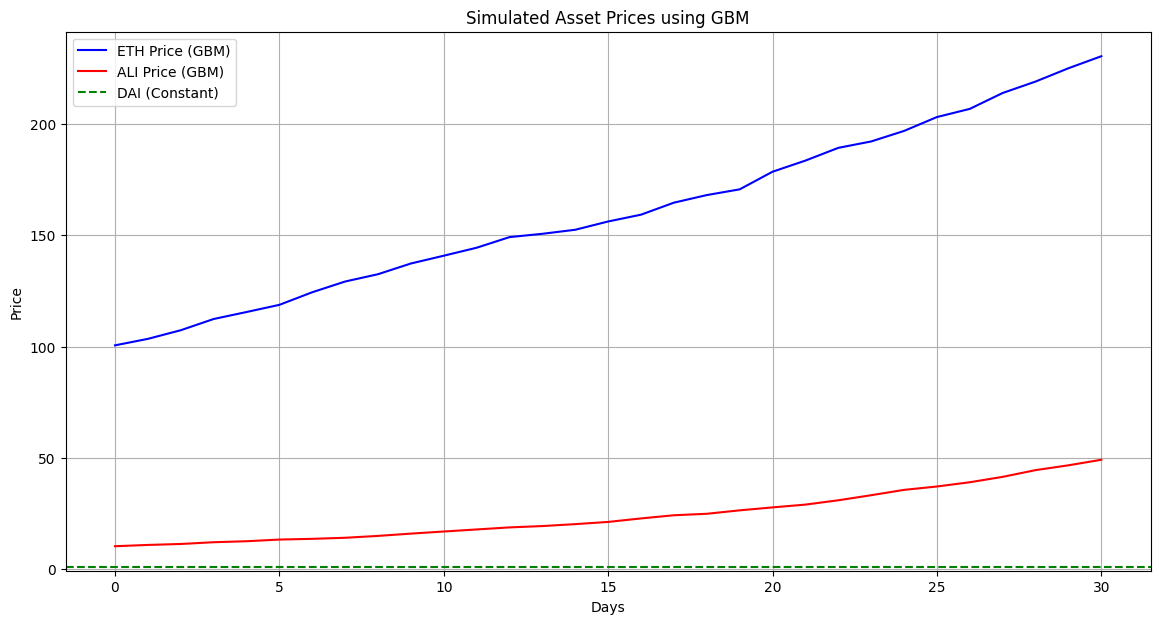

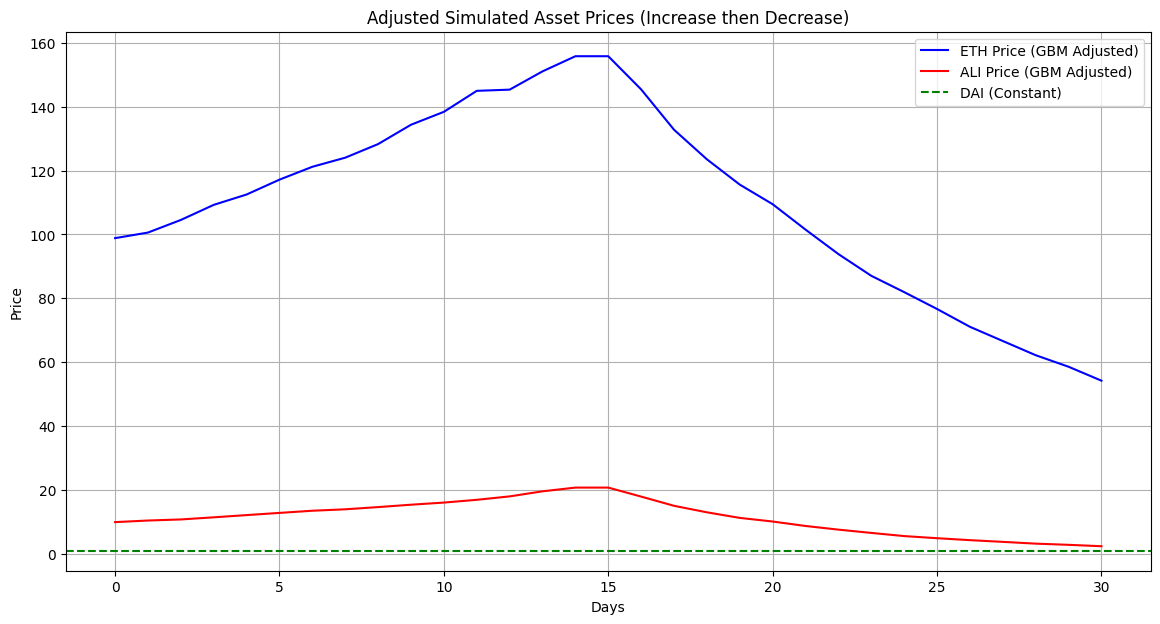

In [25]:
import numpy as np

# Parameters for GBM
days = 30
dt = 1/365  # Daily increments
S0_ETH = 100  # Initial price of ETH
S0_ALI = 10  # Initial price of ALI
mu_ETH = 0.05  # Drift coefficient for ETH
mu_ALI = 0.10  # Drift coefficient for ALI
sigma_ETH = 0.2  # Volatility for ETH
sigma_ALI = 0.3  # Volatility for ALI
np.random.seed(42)  # For reproducibility
# Parameters for adjusted GBM
mu_decrease_ETH = -0.05  # Negative drift for ETH in the second half
mu_decrease_ALI = -0.10  
# Time vector
t = np.linspace(0, days, days + 1)

# Geometric Brownian Motion (GBM) model function
def GBM(S0, mu, sigma, t, dt):
    W = np.random.standard_normal(size=len(t))
    W = np.cumsum(W)*np.sqrt(dt)  # Cumulative sum to generate a random walk
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # GBM formula
    return S

# Simulate ETH and ALI prices using GBM
prices_ETH = GBM(S0_ETH, mu_ETH, sigma_ETH, t, dt)
prices_ALI = GBM(S0_ALI, mu_ALI, sigma_ALI, t, dt)

# Plot the simulated asset prices
plt.figure(figsize=(14, 7))
plt.plot(t, prices_ETH, label='ETH Price (GBM)', color='blue')
plt.plot(t, prices_ALI, label='ALI Price (GBM)', color='red')
plt.axhline(y=1, color='green', linestyle='--', label='DAI (Constant)')
plt.title('Simulated Asset Prices using GBM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Correcting the GBM function for adjusted price simulation

def GBM_adjusted(S0, mu_increase, mu_decrease, sigma, t, dt):
    # Splitting the time period into two halves
    half_point = len(t) // 2
    t_increase = t[:half_point]
    t_decrease = t[half_point:]
    
    # Generate random walks for each half
    W = np.random.standard_normal(size=len(t))
    W = np.cumsum(W)*np.sqrt(dt)  # Cumulative sum to generate a random walk
    
    # Separate walks for increase and decrease phases
    W_increase = W[:half_point]
    W_decrease = W[half_point:]
    
    # Calculate price paths for each half using different drift coefficients
    X_increase = (mu_increase - 0.5 * sigma**2) * t_increase + sigma * W_increase
    X_decrease = (mu_decrease - 0.5 * sigma**2) * t_decrease + sigma * W_decrease
    
    # Adjusting the second half to start where the first half ended
    X = np.concatenate([X_increase, X_increase[-1] + X_decrease - X_decrease[0]])
    S = S0 * np.exp(X)
    return S

# Corrected simulation with the adjusted GBM model
prices_ETH_adjusted = GBM_adjusted(S0_ETH, mu_ETH, mu_decrease_ETH, sigma_ETH, t, dt)
prices_ALI_adjusted = GBM_adjusted(S0_ALI, mu_ALI, mu_decrease_ALI, sigma_ALI, t, dt)

# Corrected plot
plt.figure(figsize=(14, 7))
plt.plot(t, prices_ETH_adjusted, label='ETH Price (GBM Adjusted)', color='blue')
plt.plot(t, prices_ALI_adjusted, label='ALI Price (GBM Adjusted)', color='red')
plt.axhline(y=1, color='green', linestyle='--', label='DAI (Constant)')
plt.title('Adjusted Simulated Asset Prices (Increase then Decrease)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


NFT Prices with GBM Model


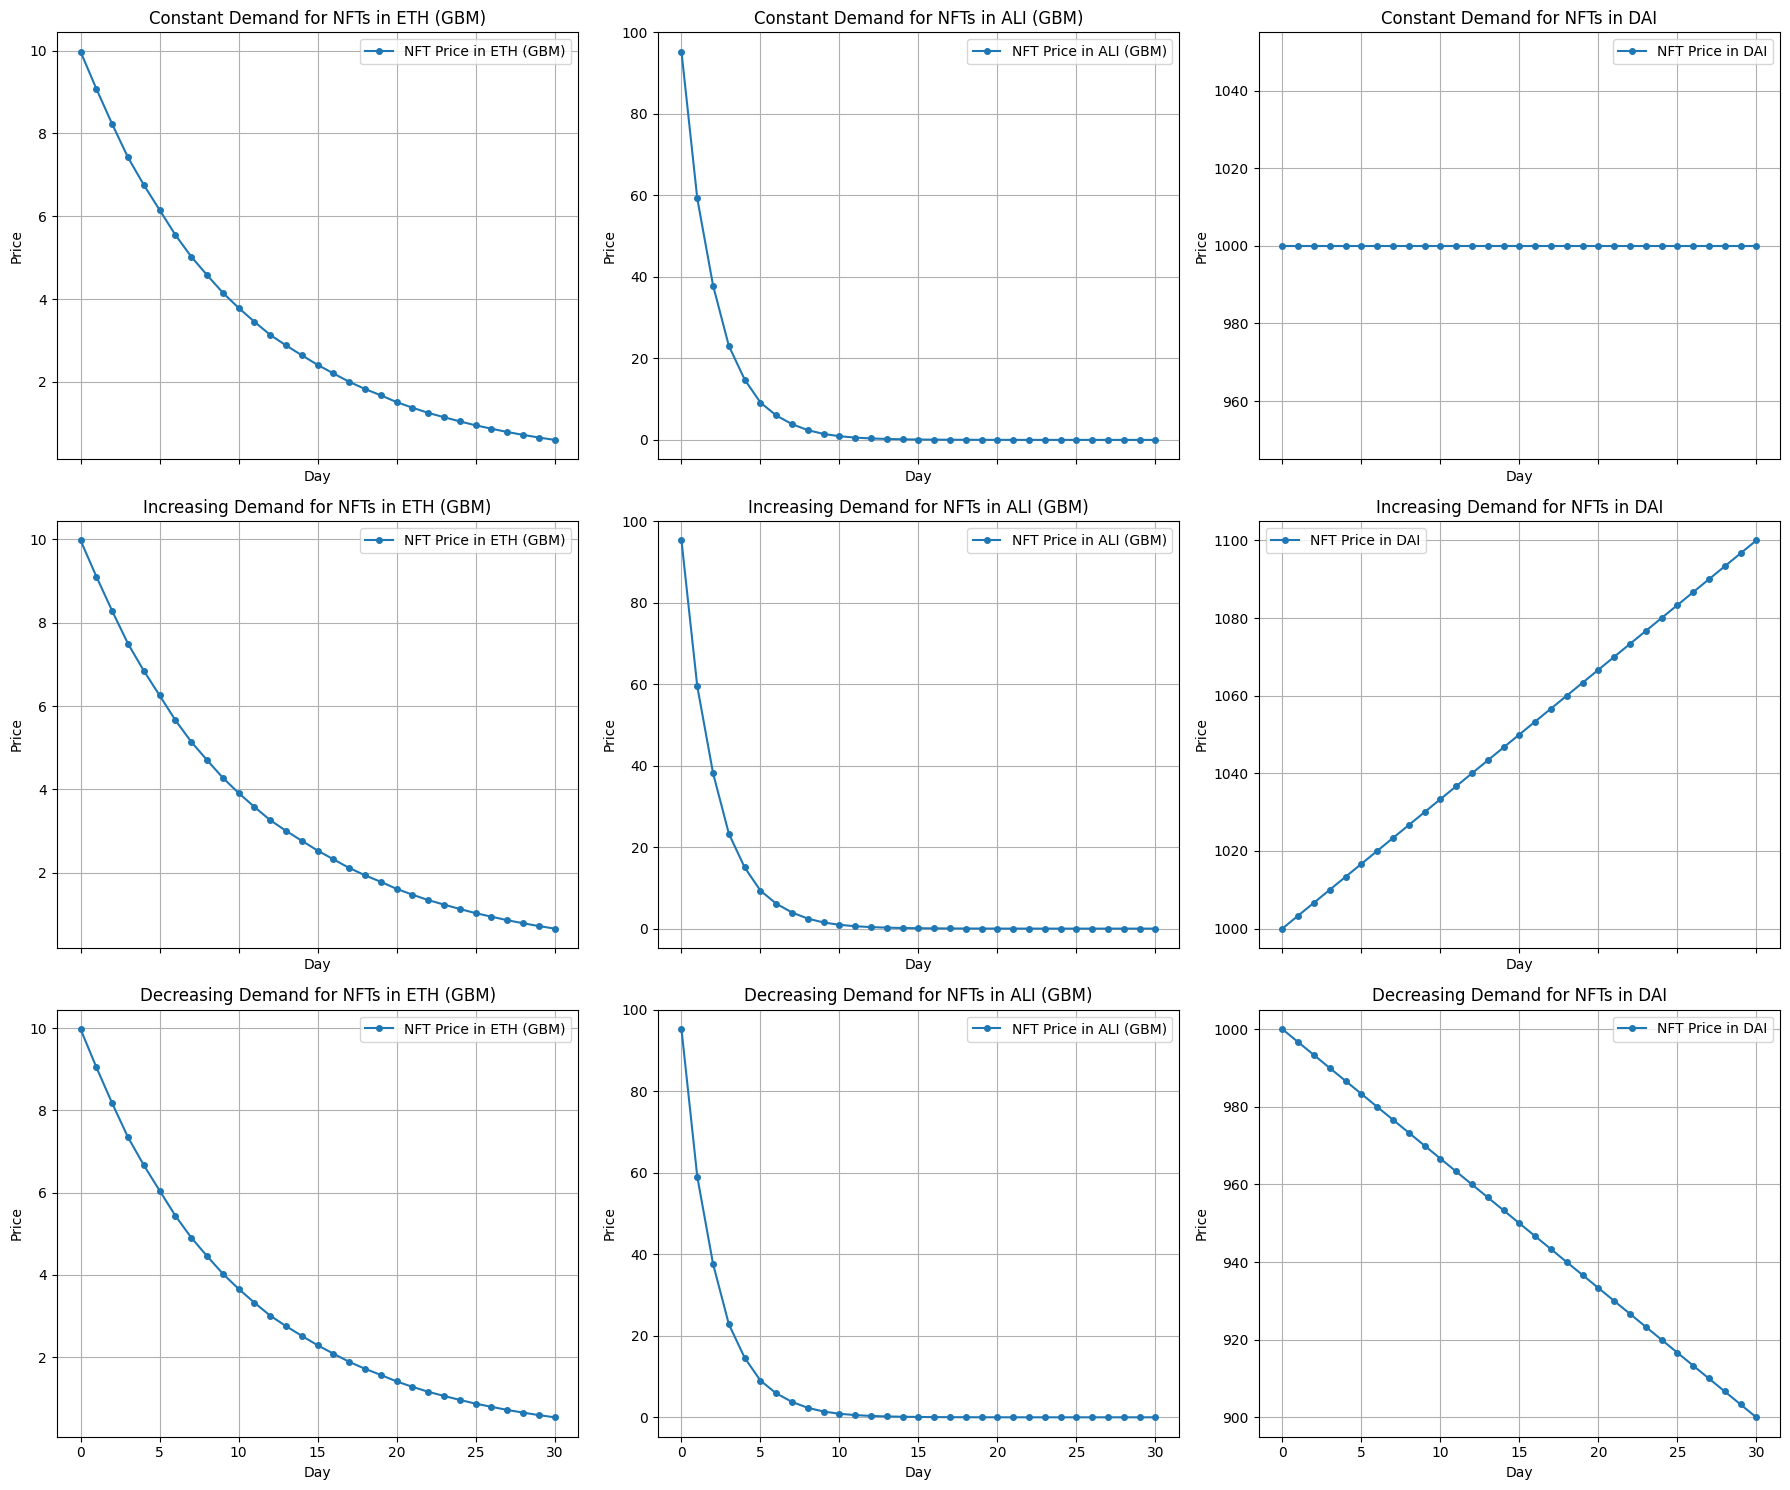

NFT Prices with Random Price Model


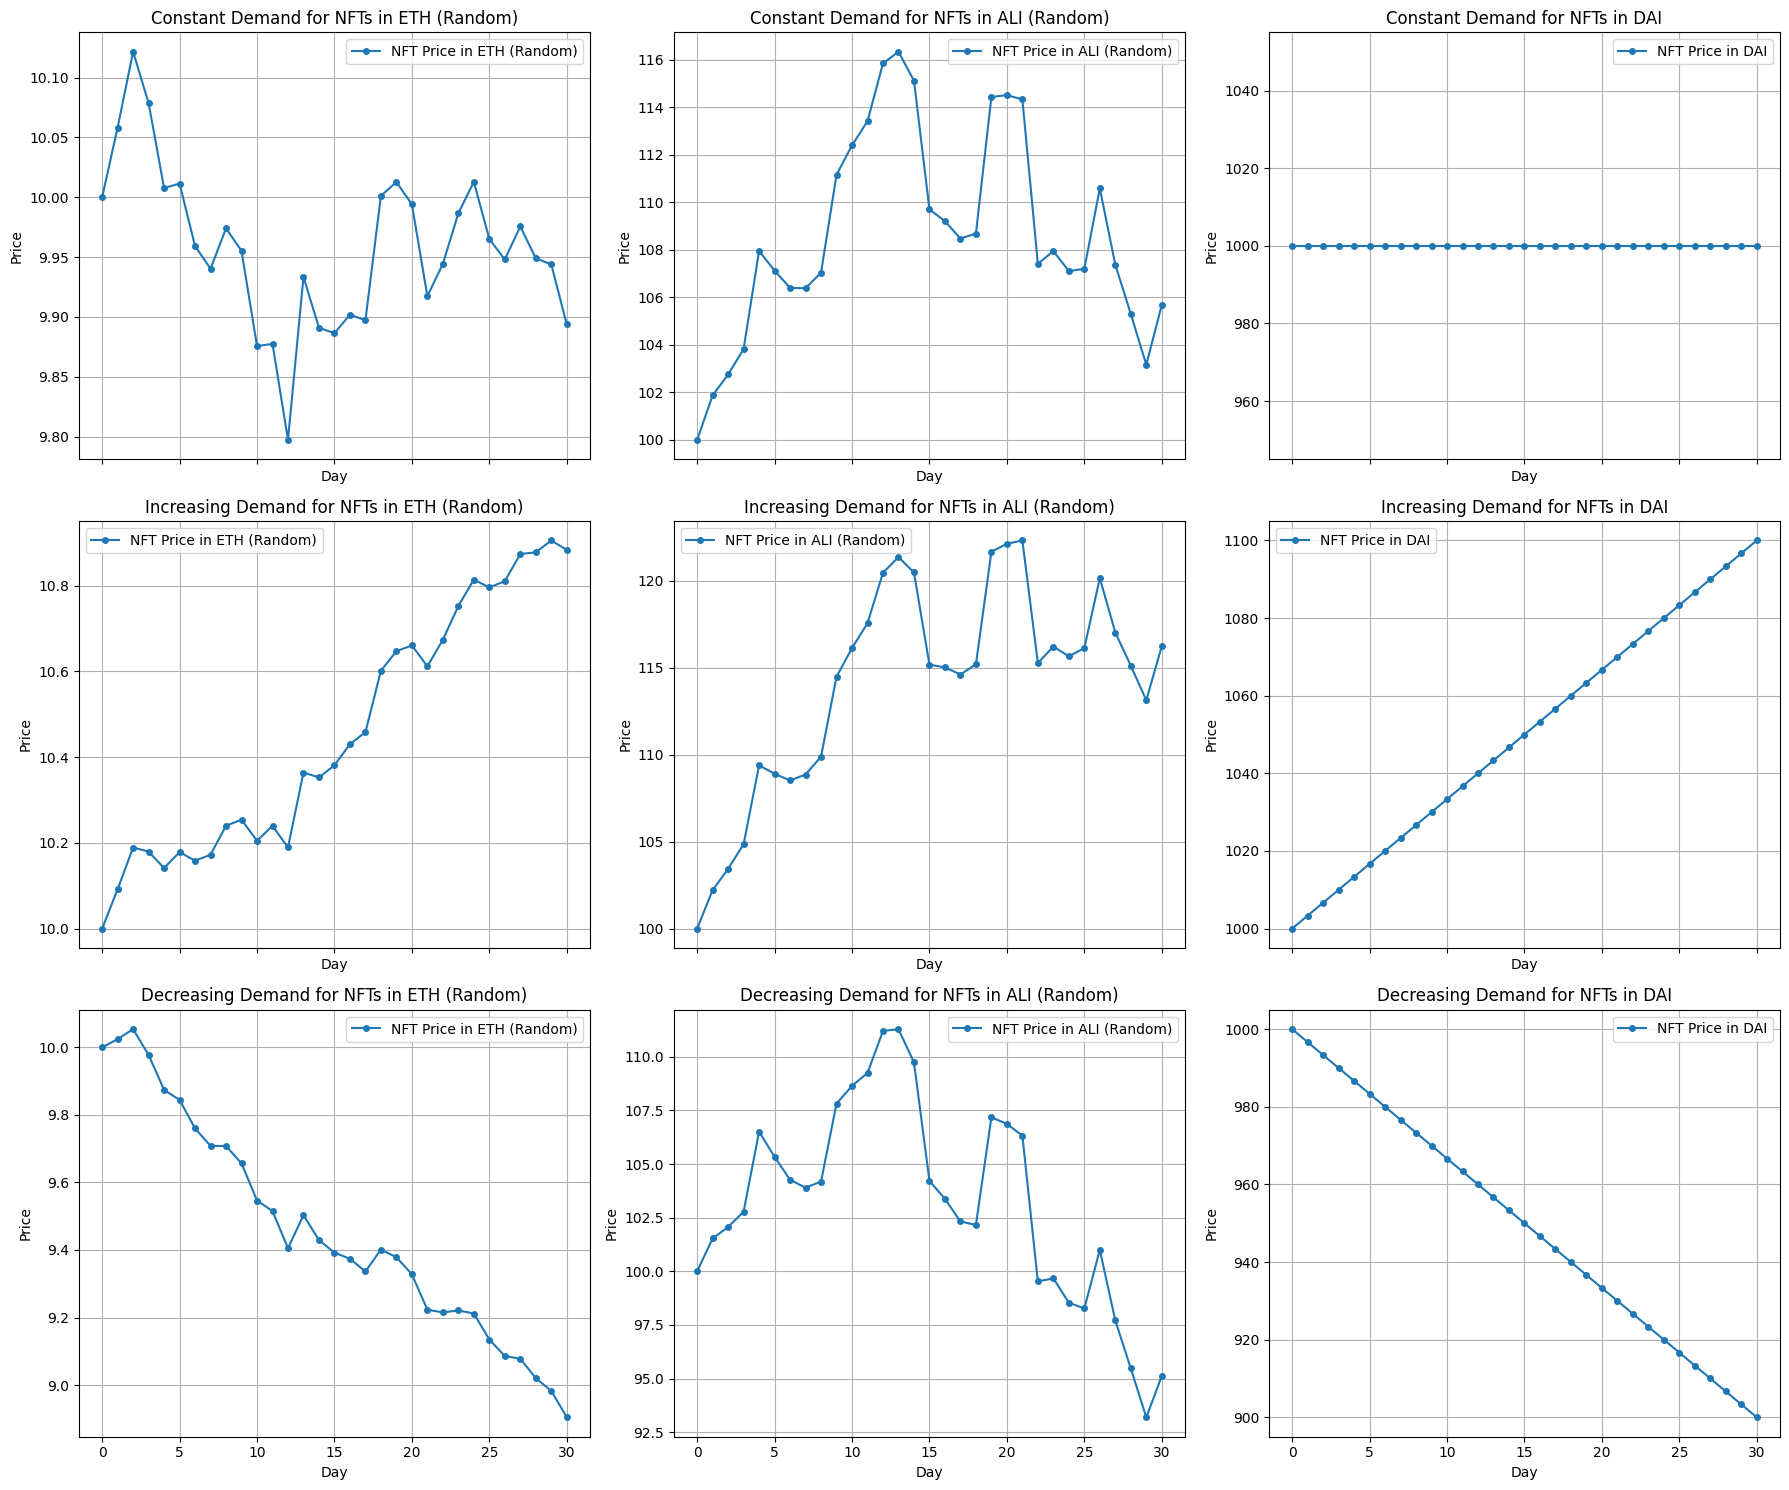

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
days = 30
dt = 1/365  # Daily increments
S0_ETH = 100  # Initial price of ETH
S0_ALI = 10  # Initial price of ALI
mu_ETH = 0.1  # Drift coefficient for ETH
mu_ALI = 0.6  # Drift coefficient for ALI
sigma_ETH = 0.1  # Volatility for ETH
sigma_ALI = 0.5  # Volatility for ALI
np.random.seed(42)  # For reproducibility

# Geometric Brownian Motion (GBM) model for ETH and ALI
def GBM(S0, mu, sigma, days, dt):
    t = np.linspace(0, days, days + 1)
    W = np.random.standard_normal(size=len(t))
    W = np.cumsum(W)*np.sqrt(dt)  # Cumulative sum to generate a random walk
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # GBM formula
    return S

# Simulate ETH and ALI prices using GBM
prices_ETH_GBM = GBM(S0_ETH, mu_ETH, sigma_ETH, days, dt)
prices_ALI_GBM = GBM(S0_ALI, mu_ALI, sigma_ALI, days, dt)

# Random price model as a simpler alternative
def random_price_model(S0, volatility, days):
    daily_returns = np.random.normal(0, volatility, days)
    price_paths = np.zeros(days + 1)
    price_paths[0] = S0
    for i in range(1, days + 1):
        price_paths[i] = price_paths[i - 1] * (1 + daily_returns[i - 1])
    return price_paths

# Simulate ETH and ALI prices using random price model
prices_ETH_random = random_price_model(S0_ETH, sigma_ETH * np.sqrt(dt), days)
prices_ALI_random = random_price_model(S0_ALI, sigma_ALI * np.sqrt(dt), days)

# Function to adjust NFT prices based on demand scenarios
def adjust_nft_prices(scenario, initial_price, days):
    if scenario == 'constant':
        return np.full(days + 1, initial_price)
    elif scenario == 'increase':
        return initial_price + np.linspace(0, initial_price * 0.1, days + 1)
    elif scenario == 'decrease':
        return initial_price - np.linspace(0, initial_price * 0.1, days + 1)

# NFT price scenarios
nft_prices_constant = adjust_nft_prices('constant', 1000, days)
nft_prices_increase = adjust_nft_prices('increase', 1000, days)
nft_prices_decrease = adjust_nft_prices('decrease', 1000, days)
nft_prices_scenarios = [nft_prices_constant, nft_prices_increase, nft_prices_decrease]

# Plotting function for NFT prices in currencies
def plot_nft_prices_in_currencies(nft_prices_scenarios, currency_prices):
    scenarios = ['Constant Demand', 'Increasing Demand', 'Decreasing Demand']
    currencies = list(currency_prices.keys())
    fig, axs = plt.subplots(len(scenarios), len(currencies), figsize=(18, 15), sharex=True)
    for i, scenario in enumerate(scenarios):
        for j, currency in enumerate(currencies):
            prices = currency_prices[currency]
            nft_price_in_currency = nft_prices_scenarios[i] / np.array(prices)
            axs[i, j].plot(nft_price_in_currency, label=f'NFT Price in {currency}', marker='o', linestyle='-', markersize=4)
            axs[i, j].set_title(f'{scenario} for NFTs in {currency}')
            axs[i, j].set_xlabel('Day')
            axs[i, j].set_ylabel('Price')
            axs[i, j].legend()
            axs[i, j].grid(True)
    plt.tight_layout()
    plt.show()

# Combine currency prices from both models
currency_prices_GBM = {'ETH (GBM)': prices_ETH_GBM, 'ALI (GBM)': prices_ALI_GBM, 'DAI': np.full(days + 1, 1)}
currency_prices_random = {'ETH (Random)': prices_ETH_random, 'ALI (Random)': prices_ALI_random, 'DAI': np.full(days + 1, 1)}

# Plot the NFT prices for GBM model
print("NFT Prices with GBM Model")
plot_nft_prices_in_currencies(nft_prices_scenarios, currency_prices_GBM)

# Plot the NFT prices for Random model
print("NFT Prices with Random Price Model")
plot_nft_prices_in_currencies(nft_prices_scenarios, currency_prices_random)


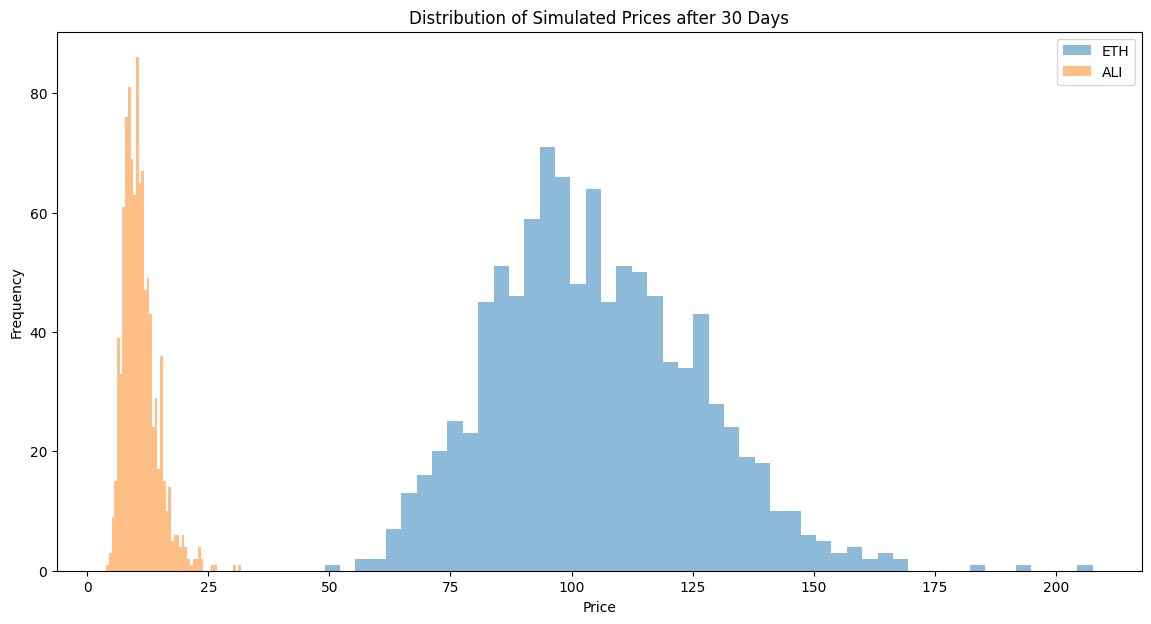

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Monte Carlo simulation
num_simulations = 1000
days = 365
S0_ETH = 100  # Initial price of ETH
S0_ALI = 10  # Initial price of ALI
mu_ETH = 0.05  # Expected return for ETH
mu_ALI = 0.10  # Expected return for ALI
sigma_ETH = 0.2  # Volatility for ETH
sigma_ALI = 0.3  # Volatility for ALI
dt = 1/365  # Time increment in years

# Function for Monte Carlo simulation using GBM
def monte_carlo_simulation(S0, mu, sigma, days, num_simulations, dt):
    t = np.linspace(0, days, days + 1)
    S = np.zeros((days + 1, num_simulations))
    S[0] = S0
    for simulation in range(num_simulations):
        Z = np.random.standard_normal(days)  # Random component
        for day in range(1, days + 1):
            S[day, simulation] = S[day - 1, simulation] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[day - 1])
    return S

# Perform Monte Carlo simulations for ETH and ALI
simulated_ETH_prices = monte_carlo_simulation(S0_ETH, mu_ETH, sigma_ETH, days, num_simulations, dt)
simulated_ALI_prices = monte_carlo_simulation(S0_ALI, mu_ALI, sigma_ALI, days, num_simulations, dt)

# Example of analyzing results (plotting the last day's distribution of prices)
plt.figure(figsize=(14, 7))
plt.hist(simulated_ETH_prices[-1], bins=50, alpha=0.5, label='ETH')
plt.hist(simulated_ALI_prices[-1], bins=50, alpha=0.5, label='ALI')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Prices after 30 Days')
plt.legend()
plt.show()

# Note: Further integration with NFT price scenarios and plotting would follow the approach outlined previously,
# adjusting the NFT prices based on the Monte Carlo simulation results for each currency.


In [16]:
# Assuming the Monte Carlo simulation function is defined as monte_carlo_simulation(S0, mu, sigma, days, num_simulations, dt)

# Parameters for NFT price scenarios
initial_NFT_price = 1000
days = 30
t=30
# Simulate ETH and ALI prices using Monte Carlo
num_simulations = 1000
simulated_ETH_prices = monte_carlo_simulation(S0_ETH, mu_ETH, sigma_ETH, days, num_simulations, dt)
simulated_ALI_prices = monte_carlo_simulation(S0_ALI, mu_ALI, sigma_ALI, days, num_simulations, dt)

# Compute the average price path for ETH and ALI
average_ETH_prices = np.mean(simulated_ETH_prices, axis=1)
average_ALI_prices = np.mean(simulated_ALI_prices, axis=1)

# Adjust NFT prices based on demand scenarios
nft_prices_constant = adjust_nft_prices('constant', initial_NFT_price, days)
nft_prices_increase = adjust_nft_prices('increase', initial_NFT_price, days)
nft_prices_decrease = adjust_nft_prices('decrease', initial_NFT_price, days)
nft_prices_scenarios = [nft_prices_constant, nft_prices_increase, nft_prices_decrease]

# Currency prices based on the Monte Carlo simulation averages
currency_prices_mc = {
    'ETH': average_ETH_prices,
    'ALI': average_ALI_prices,
    'DAI': np.full(len(t), 1)  # DAI remains constant
}

# Reusing the plot function to display NFT prices for each scenario and currency
plot_nft_prices_in_currencies(nft_prices_scenarios, currency_prices_mc)

NameError: name 'monte_carlo_simulation' is not defined

In [10]:
# Initial Prices and Conditions
initial_eth_price = 100  # Initial price of ETH in dollars
initial_nft_price_dollars = 20  # Initial dollar price of an NFT

# ETH prices for various scenarios
increased_eth_prices = [150, 200, 250]
decreased_eth_prices = [80, 50, 30]

# Scenario 1: Constant NFT Demand, Increasing ETH Price
nft_prices_in_eth_scenario1 = [initial_nft_price_dollars / eth_price for eth_price in increased_eth_prices]

# Scenario 2: Constant NFT Demand, Decreasing ETH Price
nft_prices_in_eth_scenario2 = [initial_nft_price_dollars / eth_price for eth_price in decreased_eth_prices]

# Scenario 3: Increasing NFT Demand, Increasing ETH Price
# Assuming a 25% increase in demand increases the NFT's dollar price to $25
increased_demand_price_dollars = 25
nft_prices_in_eth_scenario3 = [increased_demand_price_dollars / eth_price for eth_price in increased_eth_prices]

# Scenario 4: Decreasing NFT Demand, Decreasing ETH Price
# Assuming a 25% decrease in demand decreases the NFT's dollar price to $15
decreased_demand_price_dollars = 15
nft_prices_in_eth_scenario4 = [decreased_demand_price_dollars / eth_price for eth_price in decreased_eth_prices]

# Scenario 5: Increasing NFT Demand, Decreasing ETH Price
nft_prices_in_eth_scenario5 = [increased_demand_price_dollars / eth_price for eth_price in decreased_eth_prices]

# Scenario 6: Decreasing NFT Demand, Increasing ETH Price
nft_prices_in_eth_scenario6 = [decreased_demand_price_dollars / eth_price for eth_price in increased_eth_prices]

# Print Results for Each Scenario (Can be customized based on need to display results)
print("Scenario 1 - NFT Prices in ETH:", nft_prices_in_eth_scenario1)
print("Scenario 2 - NFT Prices in ETH:", nft_prices_in_eth_scenario2)
print("Scenario 3 - NFT Prices in ETH:", nft_prices_in_eth_scenario3)
print("Scenario 4 - NFT Prices in ETH:", nft_prices_in_eth_scenario4)
print("Scenario 5 - NFT Prices in ETH:", nft_prices_in_eth_scenario5)
print("Scenario 6 - NFT Prices in ETH:", nft_prices_in_eth_scenario6)


Scenario 1 - NFT Prices in ETH: [0.13333333333333333, 0.1, 0.08]
Scenario 2 - NFT Prices in ETH: [0.25, 0.4, 0.6666666666666666]
Scenario 3 - NFT Prices in ETH: [0.16666666666666666, 0.125, 0.1]
Scenario 4 - NFT Prices in ETH: [0.1875, 0.3, 0.5]
Scenario 5 - NFT Prices in ETH: [0.3125, 0.5, 0.8333333333333334]
Scenario 6 - NFT Prices in ETH: [0.1, 0.075, 0.06]


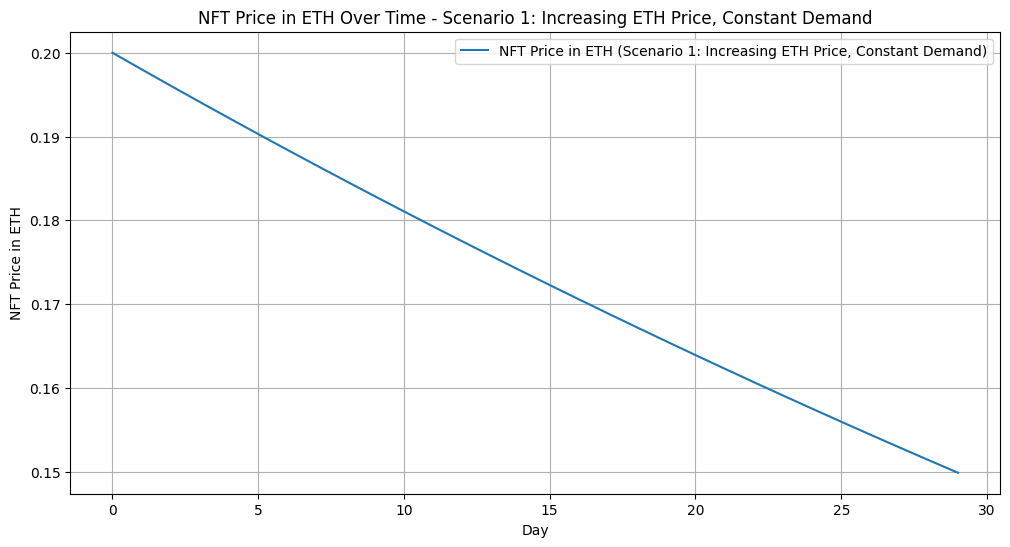

In [11]:
import matplotlib.pyplot as plt

# Function to model and plot a scenario
def model_and_plot_scenario(t_days, eth_initial_price, eth_rate_change, nft_initial_price_dollars, nft_demand_rate_change, scenario_name):
    daily_eth_prices = [eth_initial_price]
    daily_nft_prices_in_eth = [nft_initial_price_dollars / eth_initial_price]
    
    # Model the scenario over t_days
    for day in range(1, t_days):
        new_eth_price = daily_eth_prices[-1] * (1 + eth_rate_change)
        new_nft_dollar_price = nft_initial_price_dollars * (1 + nft_demand_rate_change) ** day
        daily_eth_prices.append(new_eth_price)
        daily_nft_prices_in_eth.append(new_nft_dollar_price / new_eth_price)
    
    # Plot the results
    days = list(range(t_days))
    plt.figure(figsize=(12, 6))
    plt.plot(days, daily_nft_prices_in_eth, label=f'NFT Price in ETH ({scenario_name})')
    plt.title(f'NFT Price in ETH Over Time - {scenario_name}')
    plt.xlabel('Day')
    plt.ylabel('NFT Price in ETH')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example of plotting Scenario 1: Constant NFT Demand, Increasing ETH Price
t_days = 30
eth_initial_price = 100
eth_rate_change = 0.01  # 1% daily increase
nft_initial_price_dollars = 20
nft_demand_rate_change = 0  # Constant demand

model_and_plot_scenario(t_days, eth_initial_price, eth_rate_change, nft_initial_price_dollars, nft_demand_rate_change, "Scenario 1: Increasing ETH Price, Constant Demand")


In [13]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd 
url = 'https://finance.yahoo.com/industries/%E2%8C%93energy/?guccounter=1&p=%E2%8C%93energy' 
def get_stocks(): 
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36'} 
    req = requests .get(url,headers=headers) 
    html_content = req
    return html_content
get_stocks()

<Response [404]>

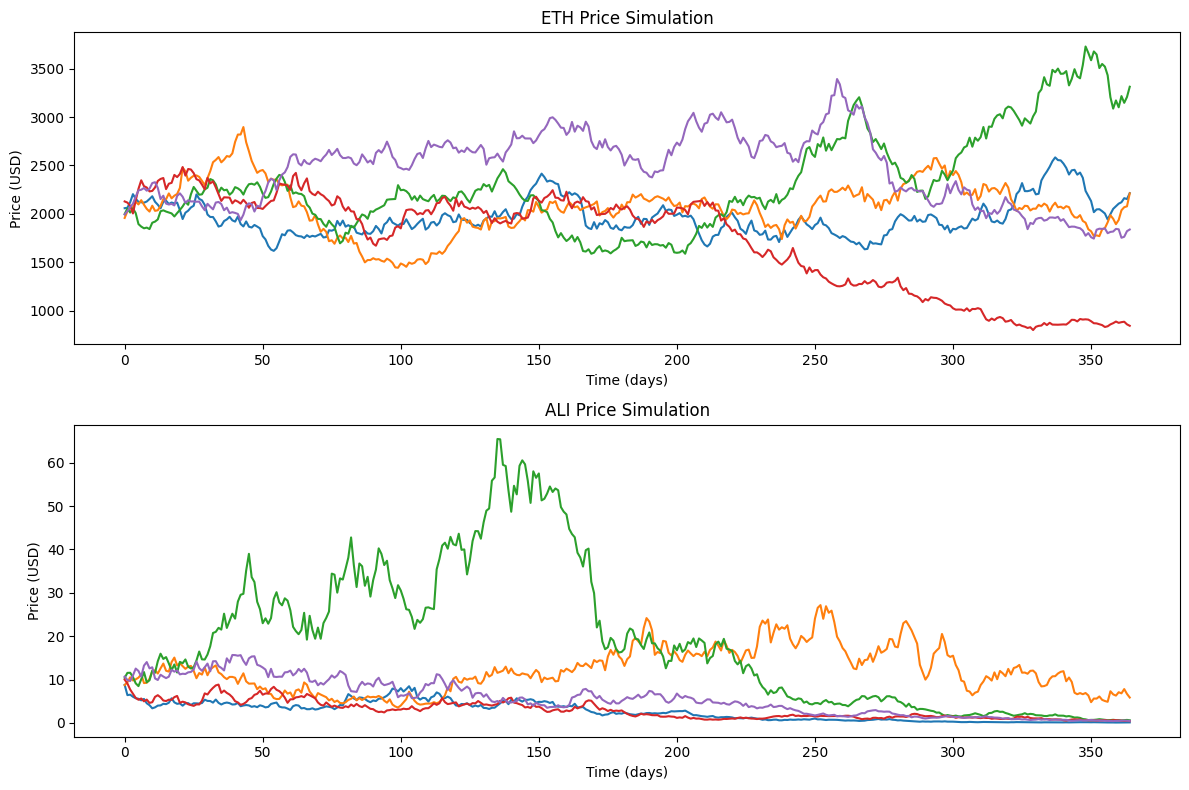

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ETH_initial_price = 2000
ALI_initial_price = 10
NFT_price = 100
ETH_volatility = 0.4722  # 47.22% volatility
ETH_drift = 0.002         # 0.2% drift
ALI_volatility = 2       # 200% volatility
ALI_drift = 0.004        # 0.4% drift
simulation_years = 1
num_simulations = 5

# Simulating price paths for ETH and ALI using geometric Brownian motion
def simulate_price(initial_price, volatility, drift, years, num_simulations):
    dt = 1/365  # Daily time step
    num_days = int(years * 365)
    daily_returns = np.exp((drift - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * np.random.randn(num_days, num_simulations))
    price_paths = initial_price * np.cumprod(daily_returns, axis=0)
    return price_paths

# Simulate price paths
eth_price_paths = simulate_price(ETH_initial_price, ETH_volatility, ETH_drift, simulation_years, num_simulations)
ali_price_paths = simulate_price(ALI_initial_price, ALI_volatility, ALI_drift, simulation_years, num_simulations)

# Plotting
plt.figure(figsize=(12, 8))

# Plot ETH price paths
plt.subplot(2, 1, 1)
plt.plot(eth_price_paths)
plt.title('ETH Price Simulation')
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')

# Plot ALI price paths
plt.subplot(2, 1, 2)
plt.plot(ali_price_paths)
plt.title('ALI Price Simulation')
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')

plt.tight_layout()
plt.show()


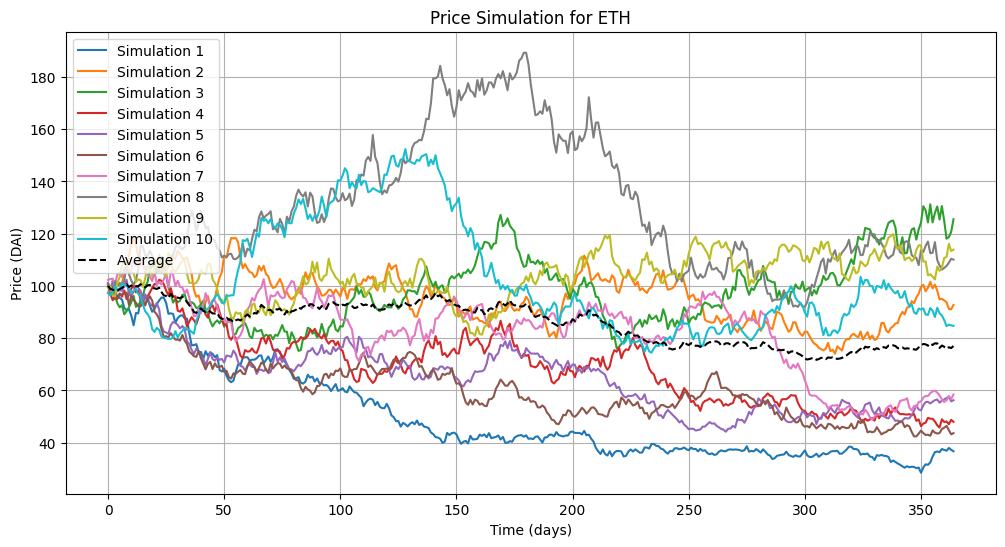

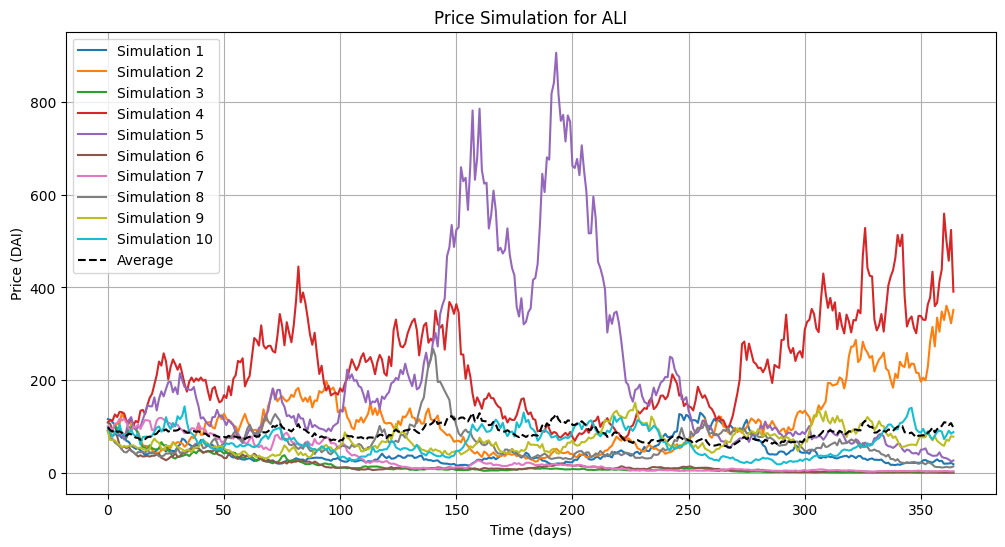

In [9]:
# Function to simulate scenario and plot price paths
def simulate_scenario(initial_price, volatility, drift, years, num_simulations, n_days, base_currency):
    # Simulate price paths for base currency
    price_paths = simulate_price(initial_price, volatility, drift, years, num_simulations)
    
    # Calculate price paths for DAI based on the base currency price paths
    dai_price_paths = price_paths / initial_price * NFT_price
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot price paths for each simulation
    for i in range(num_simulations):
        plt.plot(range(n_days), dai_price_paths[:, i], label='Simulation {}'.format(i+1))
    
    # Plot average price path
    plt.plot(range(n_days), np.mean(dai_price_paths, axis=1), color='black', linestyle='--', label='Average')
    
    plt.title('Price Simulation for {}'.format(base_currency))
    plt.xlabel('Time (days)')
    plt.ylabel('Price (DAI)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set parameters for the scenario
n_days = 365  # Number of days to simulate
num_simulations = 10  # Number of simulations

# Simulate scenario for ETH
simulate_scenario(ETH_initial_price, ETH_volatility, ETH_drift, simulation_years, num_simulations, n_days, 'ETH')

# Simulate scenario for ALI
simulate_scenario(ALI_initial_price, ALI_volatility, ALI_drift, simulation_years, num_simulations, n_days, 'ALI')


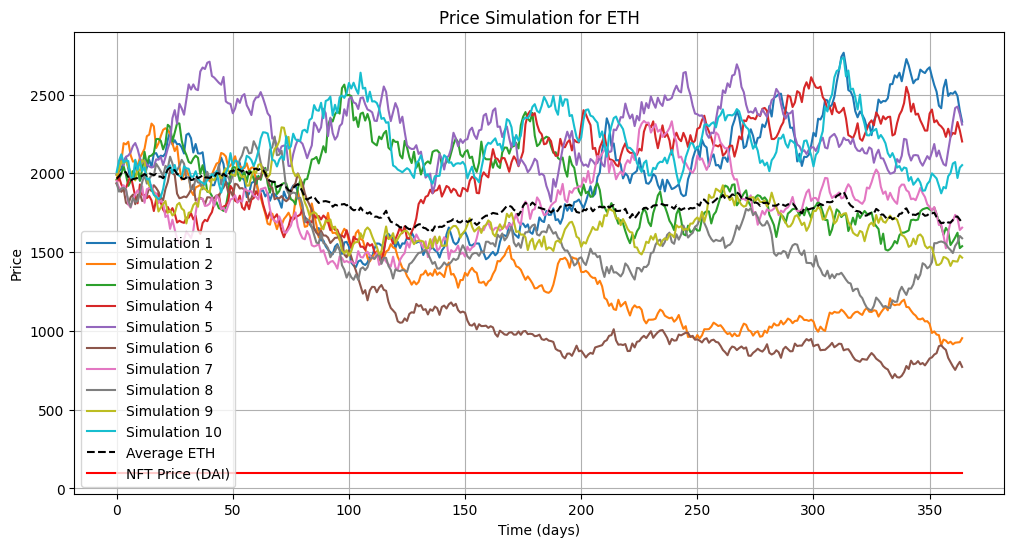

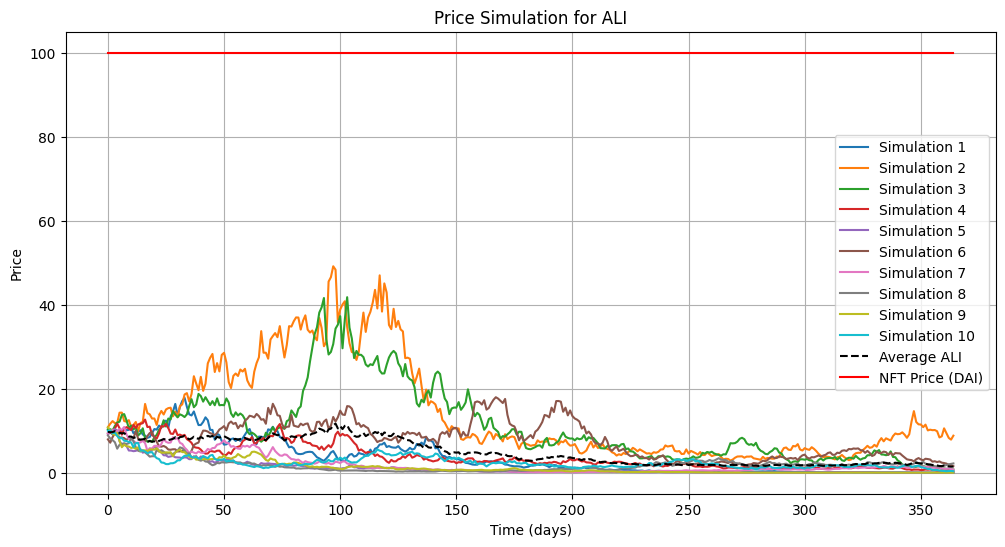

In [10]:
# Function to simulate scenario and plot price paths
def simulate_scenario(initial_price, volatility, drift, years, num_simulations, n_days, base_currency):
    # Simulate price paths for base currency
    price_paths = simulate_price(initial_price, volatility, drift, years, num_simulations)
    
    # Calculate price paths for DAI based on the base currency price paths and constant NFT demand
    dai_price_paths = np.ones((n_days, num_simulations)) * NFT_price
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot price paths for base currency
    for i in range(num_simulations):
        plt.plot(range(n_days), price_paths[:, i], label='Simulation {}'.format(i+1))
    
    # Plot average price path for base currency
    plt.plot(range(n_days), np.mean(price_paths, axis=1), color='black', linestyle='--', label='Average {}'.format(base_currency))
    
    # Plot constant price line for DAI
    plt.plot(range(n_days), np.ones(n_days) * NFT_price, color='red', linestyle='-', label='NFT Price (DAI)')
    
    plt.title('Price Simulation for {}'.format(base_currency))
    plt.xlabel('Time (days)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set parameters for the scenario
n_days = 365  # Number of days to simulate
num_simulations = 10  # Number of simulations

# Simulate scenario for ETH
simulate_scenario(ETH_initial_price, ETH_volatility, ETH_drift, simulation_years, num_simulations, n_days, 'ETH')

# Simulate scenario for ALI
simulate_scenario(ALI_initial_price, ALI_volatility, ALI_drift, simulation_years, num_simulations, n_days, 'ALI')


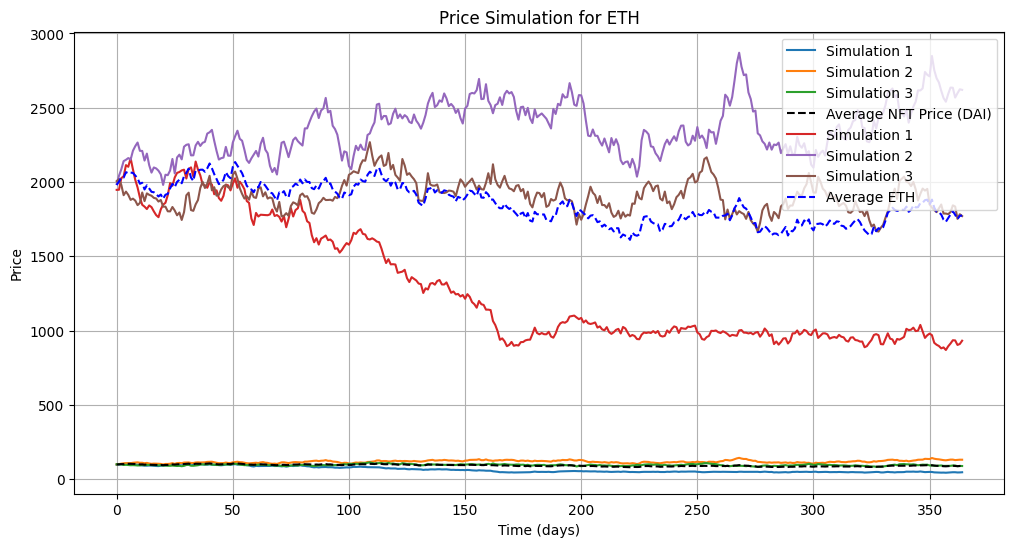

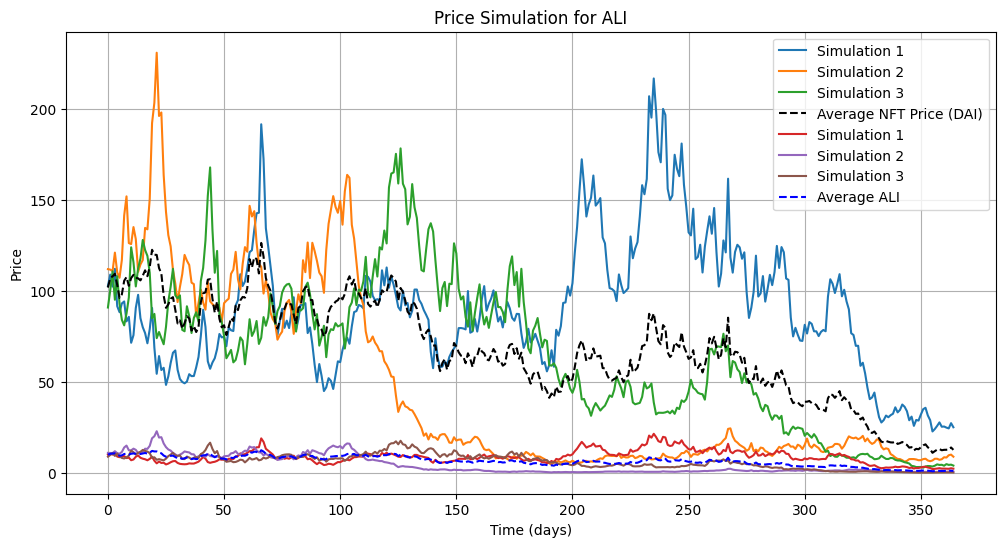

In [14]:
# Parameters
ETH_initial_price = 2000
ALI_initial_price = 10
NFT_price = 100
ETH_volatility = 0.4722  # 47.22% volatility
ETH_drift = 0.002         # 0.2% drift
ALI_volatility = 2       # 200% volatility
ALI_drift = 0.004        # 0.4% drift
simulation_years = 1
num_simulations = 3
# Function to simulate scenario and plot price paths
def simulate_scenario(initial_price, volatility, drift, years, num_simulations, n_days, base_currency):
    # Simulate price paths for base currency
    price_paths = simulate_price(initial_price, volatility, drift, years, num_simulations)
    
    # Calculate price paths for NFT based on the base currency price paths
    nft_price_paths = NFT_price / initial_price * price_paths
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot price paths for NFT
    for i in range(num_simulations):
        plt.plot(range(n_days), nft_price_paths[:, i], label='Simulation {}'.format(i+1))
    
    # Plot average price path for NFT
    plt.plot(range(n_days), np.mean(nft_price_paths, axis=1), color='black', linestyle='--', label='Average NFT Price (DAI)')
    
    # Plot price paths for base currency
    for i in range(num_simulations):
        plt.plot(range(n_days), price_paths[:, i], label='Simulation {}'.format(i+1))
    
    # Plot average price path for base currency
    plt.plot(range(n_days), np.mean(price_paths, axis=1), color='blue', linestyle='--', label='Average {}'.format(base_currency))
    
    plt.title('Price Simulation for {}'.format(base_currency))
    plt.xlabel('Time (days)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set parameters for the scenario
n_days = 365  # Number of days to simulate
num_simulations = 3  # Number of simulations

# Simulate scenario for ETH
simulate_scenario(ETH_initial_price, ETH_volatility, ETH_drift, simulation_years, num_simulations, n_days, 'ETH')

# Simulate scenario for ALI
simulate_scenario(ALI_initial_price, ALI_volatility, ALI_drift, simulation_years, num_simulations, n_days, 'ALI')


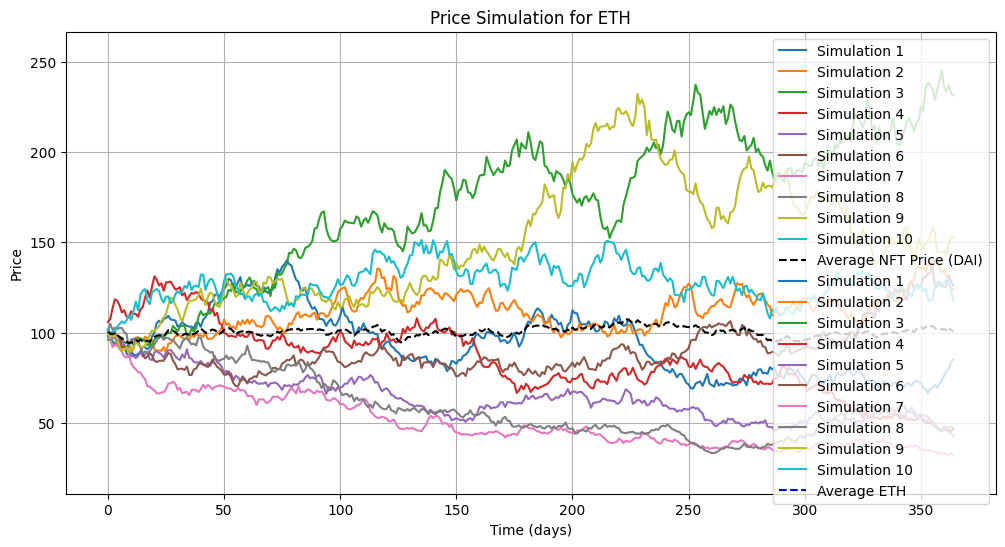

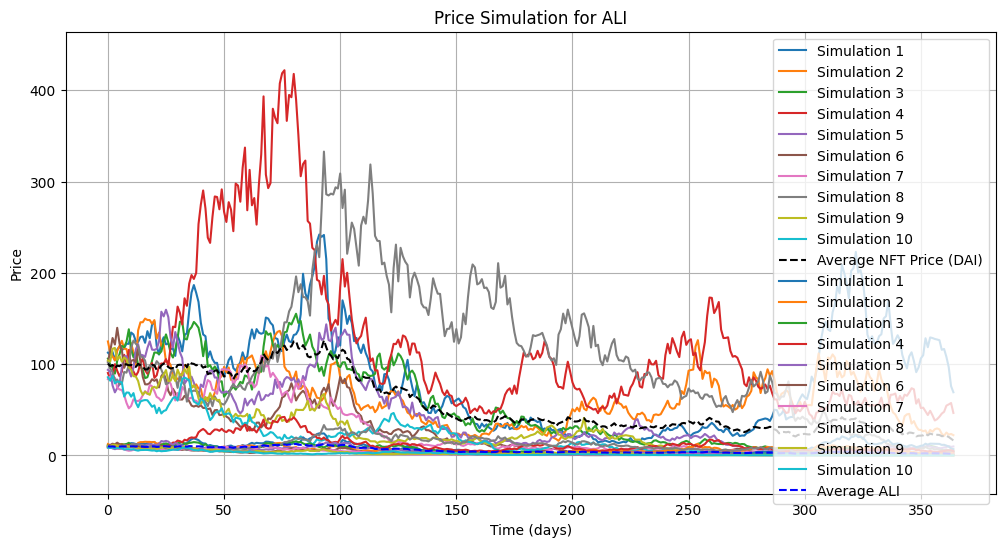

In [15]:
# Function to simulate scenario and plot price paths
def simulate_scenario(initial_price, volatility, drift, years, num_simulations, n_days, base_currency):
    # Simulate price paths for base currency
    price_paths = simulate_price(initial_price, volatility, drift, years, num_simulations)
    
    # Calculate price paths for NFT based on the base currency price paths
    nft_price_paths = NFT_price / initial_price * price_paths
    
    # Get the maximum and minimum NFT prices across all simulations
    max_nft_price = np.max(nft_price_paths)
    min_nft_price = np.min(nft_price_paths)
    
    # Calculate the y-axis limits to ensure visibility of NFT price variations
    y_lower_limit = min_nft_price - 0.1 * (max_nft_price - min_nft_price)
    y_upper_limit = max_nft_price + 0.1 * (max_nft_price - min_nft_price)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot price paths for NFT
    for i in range(num_simulations):
        plt.plot(range(n_days), nft_price_paths[:, i], label='Simulation {}'.format(i+1))
    
    # Plot average price path for NFT
    plt.plot(range(n_days), np.mean(nft_price_paths, axis=1), color='black', linestyle='--', label='Average NFT Price (DAI)')
    
    # Plot price paths for base currency
    for i in range(num_simulations):
        plt.plot(range(n_days), price_paths[:, i], label='Simulation {}'.format(i+1))
    
    # Plot average price path for base currency
    plt.plot(range(n_days), np.mean(price_paths, axis=1), color='blue', linestyle='--', label='Average {}'.format(base_currency))
    
    plt.title('Price Simulation for {}'.format(base_currency))
    plt.xlabel('Time (days)')
    plt.ylabel('Price')
    plt.ylim(y_lower_limit, y_upper_limit)  # Set custom y-axis limits
    plt.legend()
    plt.grid(True)
    plt.show()

# Set parameters for the scenario
n_days = 365  # Number of days to simulate
num_simulations = 10  # Number of simulations

# Simulate scenario for ETH
simulate_scenario(ETH_initial_price, ETH_volatility, ETH_drift, simulation_years, num_simulations, n_days, 'ETH')

# Simulate scenario for ALI
simulate_scenario(ALI_initial_price, ALI_volatility, ALI_drift, simulation_years, num_simulations, n_days, 'ALI')
